<a href="https://colab.research.google.com/github/zishan044/Machine-Learning-Lab/blob/main/regularized_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns

In [6]:
! gdown 1lM7HpS2p7BmgdjdBdDv6UITYAoJ-TqjS

Downloading...
From: https://drive.google.com/uc?id=1lM7HpS2p7BmgdjdBdDv6UITYAoJ-TqjS
To: /content/data2.txt
100% 2.35k/2.35k [00:00<00:00, 7.17MB/s]


In [7]:
data = pd.read_csv("data2.txt", header=None, names=["x1", "x2", "y"])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [8]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    neg = data['y'] == 0
    pos = data['y'] == 1
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='green', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='red', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

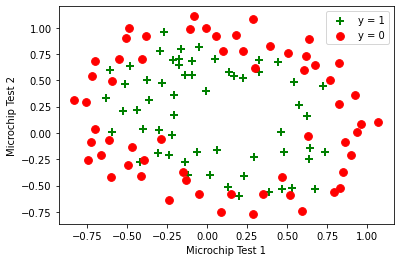

In [9]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [11]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]
X = x.values
y = y.values

In [12]:
def mapFeature( x1col, x2col):
    degrees = 10
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [13]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)

(118, 2) (118, 66)


In [14]:
from scipy.special import expit 

def h(mytheta,myX):
    return expit(np.dot(myX,mytheta))

In [15]:
def computeCost(mytheta,myX,myy,mylambda = 0.): 
    
    m = myy.size

    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:]))
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [16]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )
    g = 1.0/(1.0+np.exp(-z))
    return g

In [17]:
def compute_gradient_Reg(X, y, w):
  m,n = X.shape
  # print(m,n)
  dj_dw = np.zeros((n,))

  for i in range(m):
    f_wb_i = sigmoid(np.dot(X[i], w))  
    for j in range(n):
      dj_dw[j] = dj_dw[j] + (f_wb_i  - y[i]) * X[i,j]       
  dj_dw = dj_dw/m                                  
      
  return dj_dw

In [18]:
import copy
import math
initial_theta = np.zeros(XX.shape[1])
print(initial_theta.shape)

def optimizeRegularizedTheta(mytheta, myX, myy, alpha, num_iters, mylambda=0.):
  m = myX.shape[0]
  J_history = []
  w = copy.deepcopy(mytheta)

  for i in range(num_iters):
    dj_dw = compute_gradient_Reg(myX, myy, w)   
    w = w*(1-alpha*(mylambda/m)) - alpha * dj_dw              
  
    if i<100000:
        J_history.append( computeCost(w, myX, myy, mylambda) )

    if i% math.ceil(num_iters / 10) == 0:
        print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
  return w, min(J_history)
    
theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y, 0.1, 100)
print(theta.shape)
print(mincost)

(66,)
Iteration    0: Cost 0.691100342525338   
Iteration   10: Cost 0.6745247304834239   
Iteration   20: Cost 0.662429140756798   
Iteration   30: Cost 0.6527223265301214   
Iteration   40: Cost 0.6444403143538936   
Iteration   50: Cost 0.6371093503528475   
Iteration   60: Cost 0.6304730545334474   
Iteration   70: Cost 0.6243774784919752   
Iteration   80: Cost 0.6187210453052703   
Iteration   90: Cost 0.6134315346366914   
(66,)
0.6089396397803091


In [20]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):

    alpha = .1
    iters = 1000

    theta, mincost = optimizeRegularizedTheta(mytheta, myX, myy, alpha, iters, mylambda)
    print(theta, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

Iteration    0: Cost 0.691100342525338   
Iteration  100: Cost 0.6084547570625648   
Iteration  200: Cost 0.5695610710258278   
Iteration  300: Cost 0.5416710089367659   
Iteration  400: Cost 0.5198661671992133   
Iteration  500: Cost 0.5021505299816056   
Iteration  600: Cost 0.4873998933845835   
Iteration  700: Cost 0.4748894276765046   
Iteration  800: Cost 0.4641208383686552   
Iteration  900: Cost 0.4547377973709433   
[ 1.26417001e+00  7.35785885e-01  1.34575328e+00 -2.05425981e+00
 -9.41669252e-01 -1.20175477e+00  2.36484563e-01 -4.14345656e-01
 -4.16023101e-01 -1.18983482e-02 -1.50604511e+00 -8.73088139e-02
 -6.65501535e-01 -2.97257007e-01 -1.06321371e+00 -1.61310274e-01
 -2.42833027e-01 -7.79800864e-02 -2.93290541e-01 -3.33313239e-01
 -3.29543875e-01 -1.06496165e+00  5.95148218e-03 -3.24248588e-01
 -5.39771789e-03 -3.48586876e-01 -1.63715987e-01 -8.23557181e-01
 -3.06198193e-01 -1.24851523e-01 -5.83636352e-02 -1.27239389e-01
 -5.16787175e-02 -1.85022617e-01 -2.23006646e-01 -4

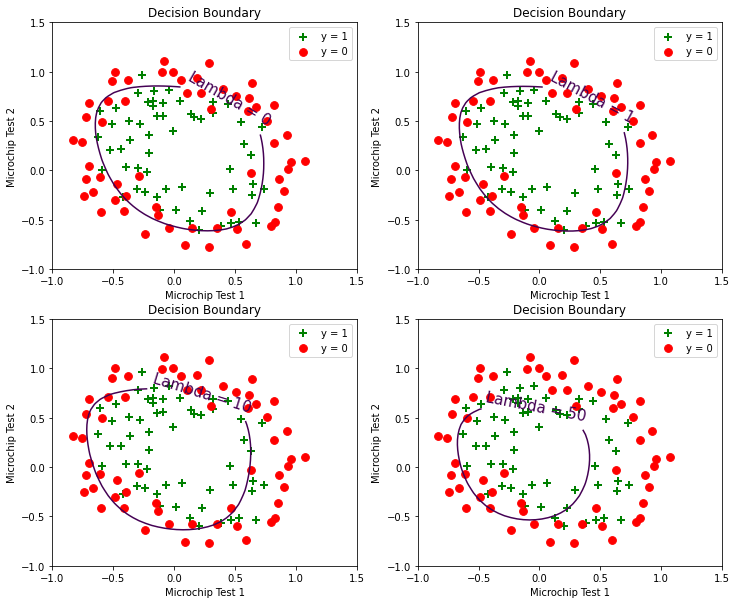

In [21]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta, XX, y, 0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,50.)